# **US AIRLINE TWITTER SENTIMENT ANALYSIS**




## **Social media sentiment analysis**
##<img src="https://media.licdn.com/dms/image/C4E12AQHV20xX7RJkaA/article-cover_image-shrink_720_1280/0/1617895464402?e=2147483647&v=beta&t=1gTaK7XzmKJHp6lnYZi3qQxeaSBiXaOfljMKQtLBDrk"  width="1200" height="200">

### **Objective:**
To analyze the sentiment of tweets related to US airlines and determine the overall sentiment of the posts (positive, negative, neutral). This analysis will help airlines understand customer satisfaction, identify areas for improvement, and enhance their service quality based on customer feedback on social media.

### **Dataset:**
The project will utilize the US Airline Twitter sentiment dataset, which includes tweets from various users about different US airlines, along with sentiment labels (positive, negative, neutral).

###[ Click here to access Datset](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)


# **Import Libraries**

In [19]:
import pandas as pd
import numpy as np
import zipfile
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# **Data Collection**

In [6]:
# Unzipping the dataset
with zipfile.ZipFile('/content/Twitter_US_Airline_Sentiment_Data.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_data')


In [9]:
# Loading the dataset
df = pd.read_csv('extracted_data/Tweets.csv')

In [10]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
# Checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [12]:
# Checking for null values
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [13]:
# Dropping the columns
df.drop(['airline_sentiment_confidence', 'negativereason_confidence', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_location', 'user_timezone'], axis=1, inplace=True)

In [16]:
# Checking the dataset
df.head()

,tweet_id,airline_sentiment,negativereason,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,NaN,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,Bad Flight,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,Can't Tell,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [15]:
# Saving the dataset
df.to_csv('Twitter_US_Airline_Sentiment_Data.csv', index=False)

# **Data Preprocessing**

In [20]:
# Loading the dataset
df = pd.read_csv('Twitter_US_Airline_Sentiment_Data.csv')

In [21]:
# Checking the dataset
df.head()

,tweet_id,airline_sentiment,negativereason,airline,name,retweet_count,text,tweet_created
0,570306133677760513,neutral,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,NaN,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,Bad Flight,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,Can't Tell,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [22]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [ps.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

In [24]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

# **Exploratory Data Analysis (EDA)**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [27]:
print(df.columns)

Index(['tweet_id', 'airline_sentiment', 'negativereason', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'cleaned_text'],
      dtype='object')


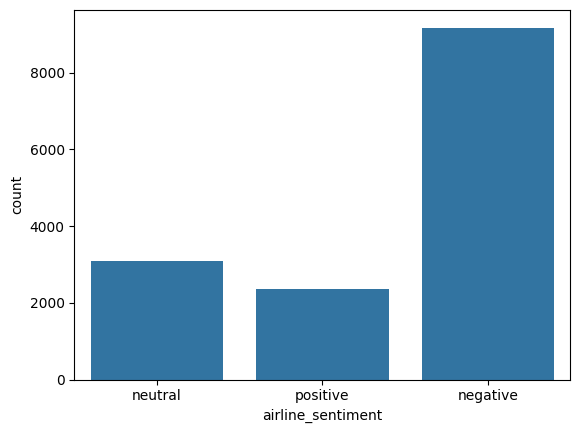

In [28]:
# Sentiment distribution
sns.countplot(x='airline_sentiment', data=df)
plt.show()

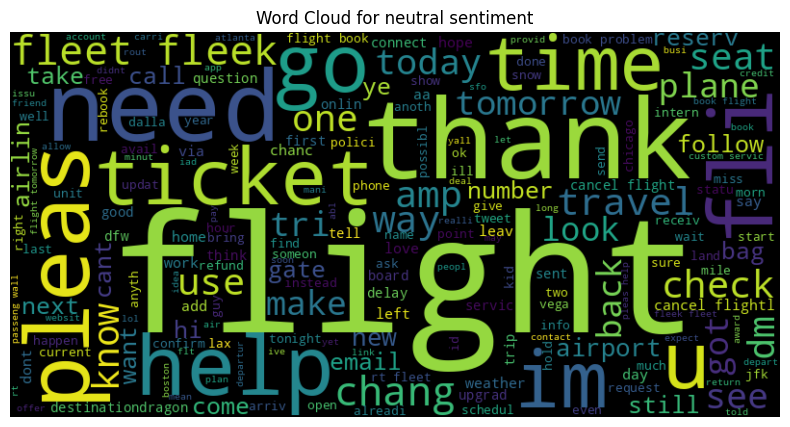

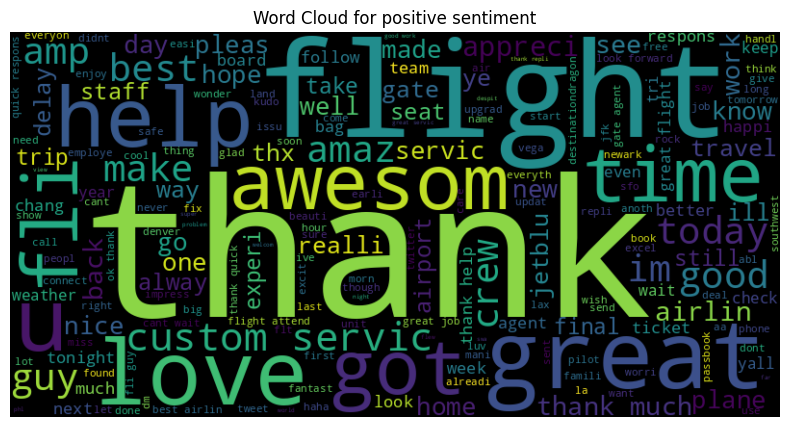

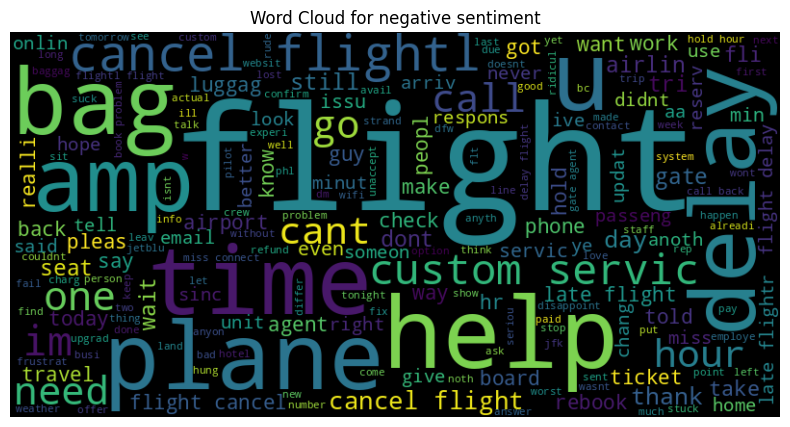

In [29]:
# Word Cloud for each sentiment
for sentiment in df['airline_sentiment'].unique():
    text = ' '.join(df[df['airline_sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} sentiment')
    plt.axis('off')
    plt.show()

# **Feature Extraction**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['airline_sentiment']


# **Model Training**

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [34]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Using other Multiple Models :**
 * Support Vector Machine
 * Naive Bayes
 * Random Forest
 * Decision Tree

In [46]:
# import dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [47]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier()
}


#**Model Evaluation**

In [48]:
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report
    }
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("="*60)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7906420765027322
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87      1889
     neutral       0.64      0.51      0.57       580
    positive       0.77      0.62      0.69       459

    accuracy                           0.79      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928

Model: Decision Tree
Accuracy: 0.7011612021857924
              precision    recall  f1-score   support

    negative       0.81      0.80      0.80      1889
     neutral       0.47      0.47      0.47       580
    positive       0.57      0.59      0.58       459

    accuracy                           0.70      2928
   macro avg       0.61      0.62      0.62      2928
weighted avg       0.70      0.70      0.70      2928

Model: Naive Bayes
Accuracy: 0.7527322404371585
              precision    recall  f1-score   support

    negative       0.75      

# **Comparing Models**

<ipython-input-51-eca11b8bafef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Accuracy', y='Model', data=data, palette='viridis')


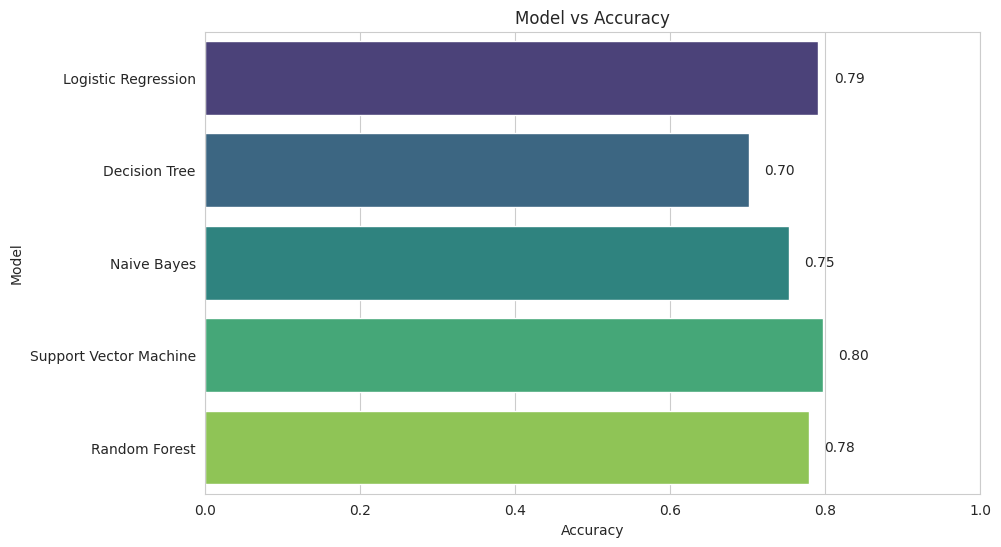

In [51]:
# Visualize Model vs Accuracy
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Reshape the 'results' dictionary for easier DataFrame creation
accuracy_data = {'Model': [], 'Accuracy': []}
for model_name, metrics in results.items():
    accuracy_data['Model'].append(model_name)
    accuracy_data['Accuracy'].append(metrics['accuracy'])

data = pd.DataFrame(accuracy_data)  # Now 'data' has the expected columns

ax = sns.barplot(x='Accuracy', y='Model', data=data, palette='viridis')
plt.title('Model vs Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)

# Add accuracy labels to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.02, p.get_y() + p.get_height() / 2,
             '{:1.2f}'.format(width), ha="left", va="center")

plt.show()


**Let us Hypertune the SVM model AS it is giving 80 Percent Accuracy**

In [62]:
# Model Training
model = SVC(probability=True,kernel='rbf')
model.fit(X_train, y_train)

SVC(probability=True)

In [63]:
# Model Prediction
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.82      0.94      0.87      1889
     neutral       0.69      0.45      0.54       580
    positive       0.79      0.66      0.72       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928

Accuracy: 0.796448087431694


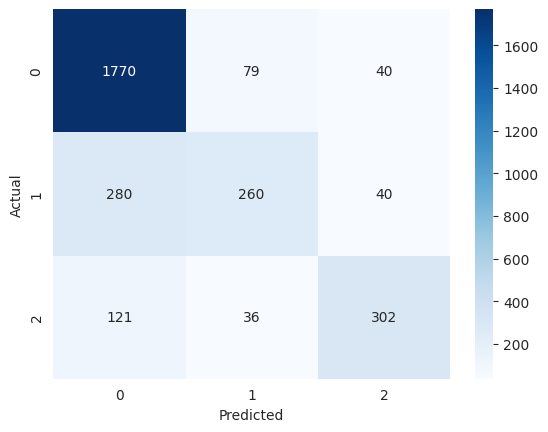

In [64]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='positive')
roc_auc = auc(fpr, tpr)

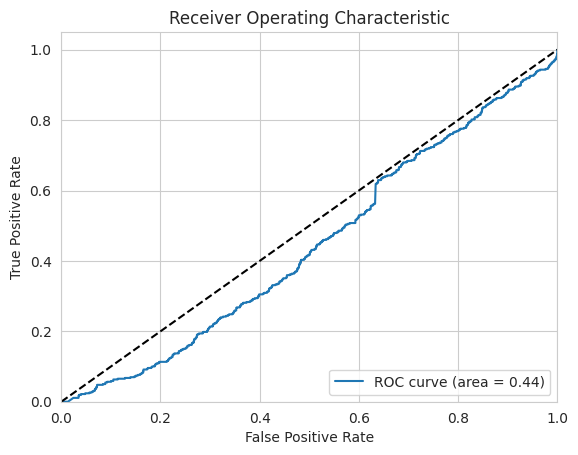

In [66]:
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# **Model Testing**

In [67]:
# Saving the model
import pickle
pickle.dump(model, open('model.pkl', 'wb'))


In [69]:
# Saving the vectorizer
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

In [71]:
# Testing my Model on random text
text = "I hate you "
vectorized_text = vectorizer.transform([text])
predicted_sentiment = model.predict(vectorized_text)[0]
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: negative
